In [188]:
import fitz # install using: pip install PyMuPDF

with fitz.open("./Guide_officiel_Freebox_Revolution.pdf") as doc:
    text = ""
    for page in doc:
        text += page.get_text()

text = text.replace("\n","§§")
text = text.replace('-§§','')
text = text.replace('§§',' ')
text = text.replace("  "," ")

In [189]:
text

''

In [190]:
from nltk import sent_tokenize,word_tokenize

In [191]:
import pandas as pd
import numpy as np

In [192]:
sentences = pd.DataFrame(sent_tokenize(text),columns=("sentences",))

In [193]:
sentences["nb_word"] = sentences.sentences.apply(lambda x :len(word_tokenize(x)) )

In [194]:
sentences[ sentences["nb_word"] < 3 ]

,sentences,nb_word


In [195]:
sentences

,sentences,nb_word


In [196]:
# STEP 1 
# import libraries 
import fitz 
import io 
from PIL import Image
from io import BytesIO

# STEP 2 
# file path you want to extract images from 
file = "./Guide_officiel_Freebox_Revolution.pdf"

all_image = list()
# open the file 
pdf_file = fitz.open(file) 

# STEP 3 
# iterate over PDF pages 
for page_index in range(len(pdf_file)): 

	# get the page itself 
	page = pdf_file[page_index] 
	image_list = page.get_images() 

	# printing number of images found in this page 
	if image_list: 
		print( 
			f"[+] Found a total of {len(image_list)} images in page {page_index}") 
	else: 
		print("[!] No images found on page", page_index) 
	for image_index, img in enumerate(page.get_images(), start=1): 

		# get the XREF of the image 
		xref = img[0] 

		# extract the image bytes 
		base_image = pdf_file.extract_image(xref) 
		image_bytes = base_image["image"] 
		
		stream = BytesIO(image_bytes)
		all_image.append(Image.open(stream))

		# get the image extension 
		image_ext = base_image["ext"] 


[+] Found a total of 1 images in page 0
[+] Found a total of 1 images in page 1
[+] Found a total of 1 images in page 2
[+] Found a total of 1 images in page 3
[+] Found a total of 1 images in page 4
[+] Found a total of 1 images in page 5
[+] Found a total of 1 images in page 6
[+] Found a total of 1 images in page 7
[+] Found a total of 1 images in page 8
[+] Found a total of 1 images in page 9
[+] Found a total of 1 images in page 10
[+] Found a total of 1 images in page 11
[+] Found a total of 1 images in page 12
[+] Found a total of 1 images in page 13
[+] Found a total of 1 images in page 14
[+] Found a total of 1 images in page 15
[+] Found a total of 1 images in page 16
[+] Found a total of 1 images in page 17
[+] Found a total of 1 images in page 18
[+] Found a total of 1 images in page 19
[+] Found a total of 1 images in page 20
[+] Found a total of 1 images in page 21
[+] Found a total of 1 images in page 22
[+] Found a total of 1 images in page 23
[+] Found a total of 1 ima

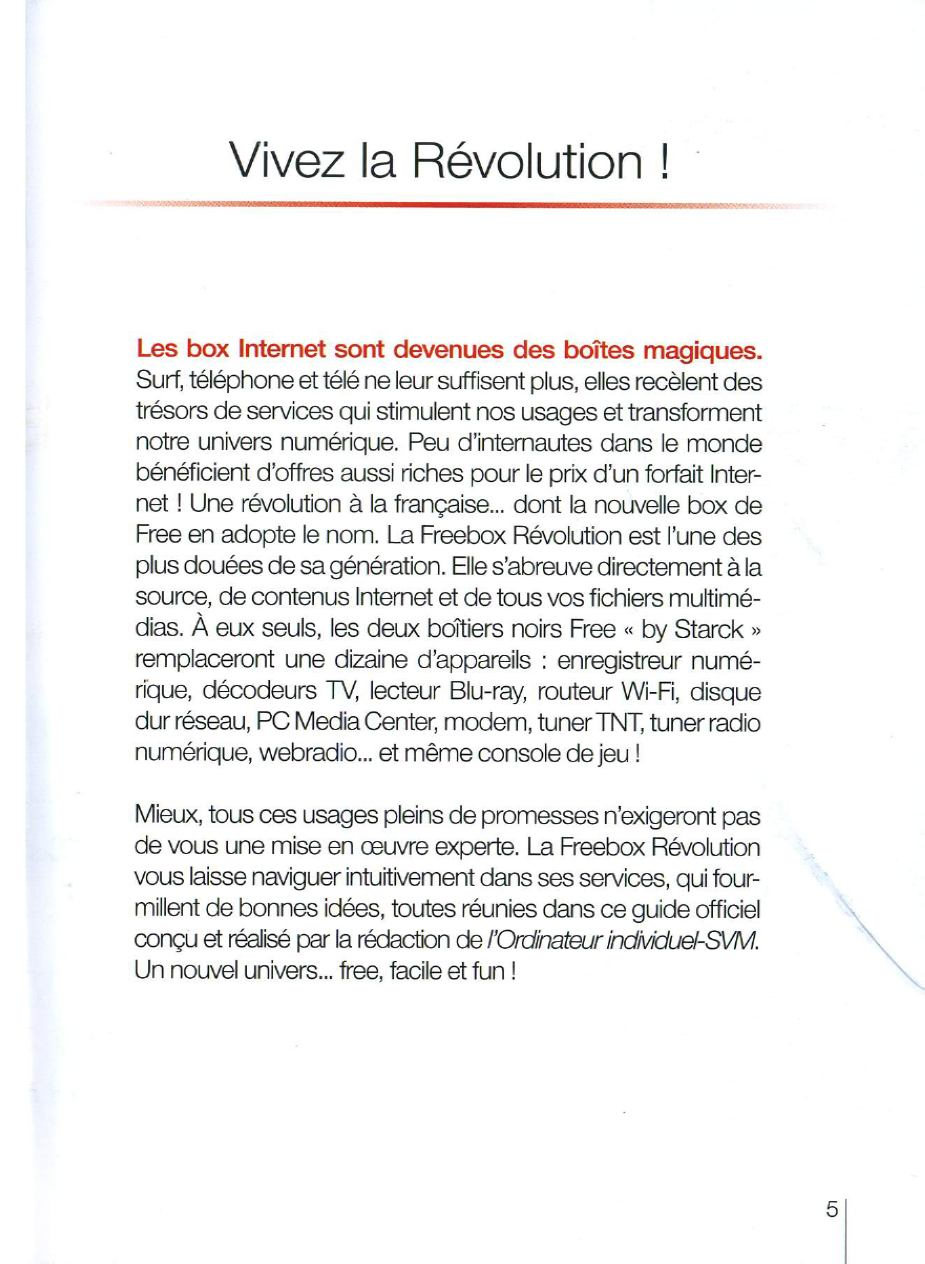

In [197]:
all_image[4]

In [198]:
pip install ollama

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ollama import Client
ollama_client = Client(host='http://localhost:11434')


In [2]:
import pytesseract
from PIL import Image

text = ""

# Utiliser pytesseract pour extraire le texte
for img in all_image:
    text += pytesseract.image_to_string(img)

# Afficher le texte extrait
print(text)


NameError: name 'all_image' is not defined

In [ ]:
text = text.replace("\n","§§")
text = text.replace('-§§','')
text = text.replace('§§',' ')
text = text.replace("  "," ")

In [3]:
text

''

In [4]:
from nltk import sent_tokenize,word_tokenize

In [5]:
sentences = pd.DataFrame(sent_tokenize(text),columns=("sentences",))

NameError: name 'pd' is not defined

In [ ]:
sentences

,sentences
0,"GUI freebox Be, Ol lel BY SHARCK® guide offici..."
1,www.abo-ordinateurindividuel-svm.con par mois ...
2,Les box Internet sont devenues des boites magi...
3,"Surf, telephone et télé ne leur suffisent plus..."
4,Peu d’internautes dans le monde bénéficient d’...
...,...
526,| ~~ e @ ot Deese & Uo.
527,pineal witaay OUT ible TZE@ | rrove!| VS] RAD ...
528,nio- O & @ =I om Fy FO te ot tve2snie le Gi La...
529,ex ceunamear Ay wamran GEE oc + mn om AHA * La...


In [6]:
sentences["nb_word"] = sentences.sentences.apply(lambda x :len(word_tokenize(x)) )

NameError: name 'sentences' is not defined

In [7]:
sentences[ sentences["nb_word"] >=4 ]

NameError: name 'sentences' is not defined

In [8]:
non_sens = sentences.iloc[526].sentences

NameError: name 'sentences' is not defined

In [9]:
ollama_client.pull("llama3")

{'status': 'success'}

In [10]:
response = ollama_client.chat(model='llama3', messages=[
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
])

In [69]:
import fitz # install using: pip install PyMuPDF
def extract_text_pdf(file_path: str) -> str:
    

    with fitz.open(file_path) as doc:
        text = ""
        for page in doc:
            text += page.get_text()

    return text.replace('-\n',"")
text = extract_text_pdf("./b2c_contrac.pdf")

In [70]:

sentences = text.split('.\n')
sentences = list(map(lambda x: x.replace('\n',' '),sentences))


In [71]:
ollama_client.pull('mxbai-embed-large')

{'status': 'success'}

In [207]:
OLLAMA_URL = 'http://localhost:11434'
import ollama
import numpy as np
from ollama import Client

def get_embed(sentence: str,model_name='llama3'):
    ollama_client = Client(host=OLLAMA_URL)
    response = ollama_client.embeddings(model=model_name,
                              prompt=sentence)
    return response["embedding"]
from openai import OpenAI
client = OpenAI(
    # This is the default and can be omitted
    api_key="sk-proj-dnvpz5FQsNgHRhnWQx6tT3BlbkFJmbdRwqCwIK2U98gCk7F8"
)

#def get_embed(sentence):
#    embed = client.embeddings.create(input = [sentence], model="text-embedding-3-large").data[0].embedding
#    return embed


In [208]:
sentences = list(filter( lambda x: x !='', sentences))

In [209]:
from tqdm import tqdm
all_embed = list()
for s in tqdm(sentences):
    all_embed.append(get_embed(s))

  0%|          | 0/121 [00:00<?, ?it/s]

In [172]:
all_embed = np.array(all_embed)

In [173]:
import faiss

In [174]:
all_embed.shape[1]

3072

In [178]:
index = faiss.IndexFlatL2(all_embed.shape[1])

In [179]:
index.add(all_embed)

In [191]:
question = "Les différents échéanciers?"
query_vector = np.array(get_embed(question),dtype='float32')
query_vector = query_vector.reshape(1,-1)
query_vector.shape

(1, 3072)

In [192]:
question

'Les différents échéanciers?'

In [193]:
distances, indices = index.search(query_vector, 10)

In [194]:
indices

array([[46, 44, 48, 84, 86, 21, 11, 47, 82, 10]], dtype=int64)

In [195]:
distances

array([[1.2230229, 1.317286 , 1.3296313, 1.3314252, 1.337519 , 1.3463576,
        1.3551418, 1.3555057, 1.3576293, 1.3913984]], dtype=float32)

In [196]:
import pandas as pd
df_sentense = pd.DataFrame(sentences,columns=["sentenses"])

In [197]:
indices

array([[46, 44, 48, 84, 86, 21, 11, 47, 82, 10]], dtype=int64)

In [198]:
context = df_sentense.iloc[indices[0]]

In [199]:
data = '\n - '.join([s for s in context.sentenses])
prompt=f"Utilise ces données: {data}.\n Réponds à cette question: {question} \n Si les informations ne sont pas presentent dit 'Je ne sait pas'. sans rien en plus"

In [200]:
print(prompt)

Utilise ces données: Les  sommes  seront  débitées  des mensualités  selon  l’échéancier  de paiement défini avec le Client. En vue de définir  et  valider  l’échéancier  de paiement,  des  pièces  justificatives pourront être demandées au Client.  Ci-après  les  différents  échéanciers proposés au paragraphe précédent : ●Paiement  en  3  fois  :  un  apport obligatoire,  débité  le  jour  de  la confirmation  de  la  commande, correspondant  à  une  partie  de  la commande et à des frais de 1,5% du montant total de la commande, si les frais ne sont pas offerts
 - Le  client  est  tenu  au  paiement  au prorata  temporis  des  prestations  déjà réalisées.  Article 8 - Déroulement de la  prestation Durant la prestation, le Client s’engage à respecter les modalités définies dans la convention, le contrat, le devis ou le bon de  commande  et  leurs  annexes éventuelles.  Dans le cadre d’une prestation conclue avec  une  personne  morale,  cette dernière  s’engage  à  communiquer  et faire

In [201]:
output = ollama.generate(
  model="llama3",
  prompt=prompt
)

print(output["response"])

Les différents échéanciers proposés sont :

* Paiement en 3 fois : un apport obligatoire, débité le jour de la confirmation de la commande, correspondant à une partie de la commande et à des frais de 1,5% du montant total de la commande.
* Paiement en 6 fois : un apport obligatoire, débité le jour de la confirmation de la commande, correspondant à une partie de la commande et à des frais de 3,55% du montant total de la commande.
* Paiement en 10 fois : un apport obligatoire, débité le jour de la confirmation de la commande, correspondant à une partie de la commande et à des frais de 6,45% du montant total de la commande.


In [117]:
import os
from openai import OpenAI

In [205]:
import os
from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key="sk-proj-dnvpz5FQsNgHRhnWQx6tT3BlbkFJmbdRwqCwIK2U98gCk7F8"
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="gpt-3.5-turbo",
)

In [206]:
print(chat_completion.choices[0].message.content)

Les différents échéanciers proposés sont :
- Paiement en 3 fois
- Paiement en 12 fois
- Paiement en 6 fois
- Paiement en 10 fois


In [204]:
text = "il fait gris"
model = "text-embedding-3-large"

In [57]:
embed = client.embeddings.create(input = [text], model=model).data[0].embedding

In [58]:
len(embed)

3072